# Домашнее задание по статистическому анализу на python

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from pylab import rcParams
rcParams['figure.figsize'] = 7,7

Загрузить датасет по url:


In [137]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [138]:
df.head() 

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [139]:
#Функция подсчета элементов с один и тем же значением
def count_el(row):
    dic={}
    for el in row:
        dic.setdefault(el,0)
        dic[el]+=1
    return dic

#Возвращает список ключей из словаря
def list_key(dic):
    list_=[]
    for el in dic.keys():
        list_.append(el)   
    return list_

#Возвращает список значений из словаря
def list_values(dic):
    list_=[]
    for el in dic.values():
        list_.append(el)   
    return list_

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

<BarContainer object of 156 artists>

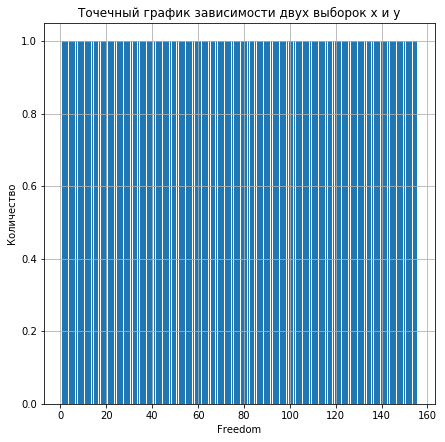

In [140]:
_dic={}
_dic = count_el(df['Freedom'])
plt.xlabel('Freedom')
plt.ylabel('Количество')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.bar(_dic.keys(), _dic.values())
# Из представленного графика видно, что распределение равномерное Freedom

<BarContainer object of 156 artists>

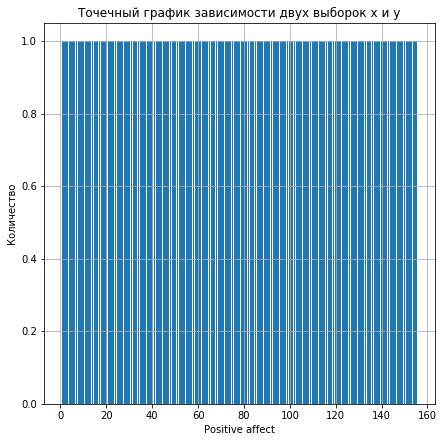

In [141]:
_dic={}
_dic = count_el(df['Positive affect'])
plt.xlabel('Positive affect')
plt.ylabel('Количество')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.bar(_dic.keys(), _dic.values())
# Из представленного графика видно, что распределение равномерное Positive affect

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [150]:
import statistics
print('Медиана: ', statistics.median(df['Freedom']))
try:
    print('Значение моды: ', statistics.mode(df['Freedom']))
except Exception as e:
    print('Не имеет моды')
print('Математическое ожидание: ',statistics.mean(df['Freedom']))
print('Стандартное отклонение: ',statistics.pstdev(df['Freedom']))
print('Дисперсия: ',statistics.pvariance(df['Freedom']))
print('Минимум: ',min(df['Freedom']))
print('Максимум: ',max(df['Freedom']))
duration_range = max(df['Freedom']) - min(df['Freedom'])
print('Выбросы: ',df['Freedom'].isnull().sum())
print('Размах: ',duration_range)

Медиана:  71.0
Не имеет моды
Математическое ожидание:  nan
Стандартное отклонение:  nan
Дисперсия:  nan
Минимум:  1.0
Максимум:  155.0
Размах:  154.0
Выбросы:  1


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:

Исследуемые переменные X и Y должны быть распределены нормально.
Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений.
Количество значений в исследуемых переменных X и Y должно быть одинаковым.

Из вышесказанного можно заключить, что посчитать корреляцию не возможно, не выполняется первое условие
- Freedom - равномерно распределение
- positive affect - равномерно распределение

Коэффициент корреляции Пирсона: nan


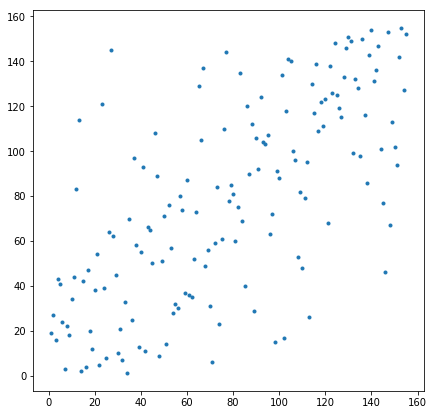

In [116]:
from scipy.stats import pearsonr

# Подсчитанный коэффициент Пирсона
corr,value = pearsonr(df['Positive affect'],df['Freedom'] )

#графическое представление
plt.scatter(df['Freedom'],df['Positive affect'],marker='.')
print('Коэффициент корреляции Пирсона:', corr)
# Из графического представление, наглядно видно, что нет очевидной зависимости
# между двумя велечинами


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [164]:
from sklearn import preprocessing
import numpy 
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
x=list_key(_dic)
y=list_values(_dic)
trans = pd.DataFrame(x,columns=['Value'])
trans['Quantity']=pd.DataFrame(y,columns=['Quantity'])
trans.head()
np_scaled = min_max_scaler.fit_transform(trans[['Value','Quantity']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1
0,0.259740,0.0
1,0.149351,0.0
2,0.097403,0.0
3,0.012987,0.0
4,0.071429,0.0


Построить матрицу корреляций для всех колонок таблицы

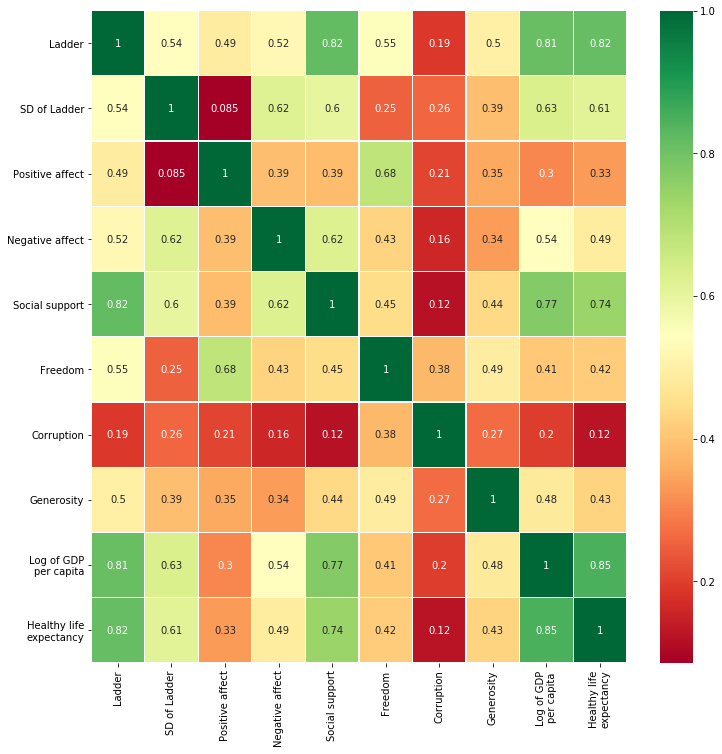

In [131]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [167]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

<BarContainer object of 259 artists>

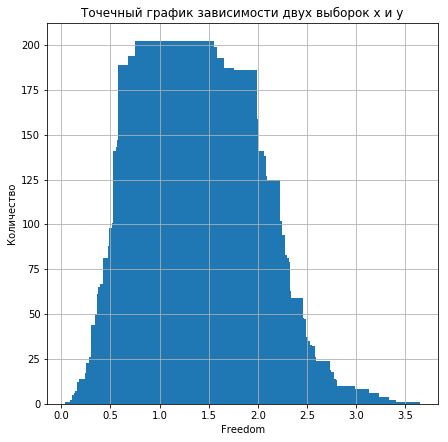

In [168]:
_dic={}
_dic = count_el(df['AveragePrice'])
plt.xlabel('Freedom')
plt.ylabel('Количество')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.bar(_dic.keys(), _dic.values())
# Нормальное распределение

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Корреляция:  -0.20831704848788477


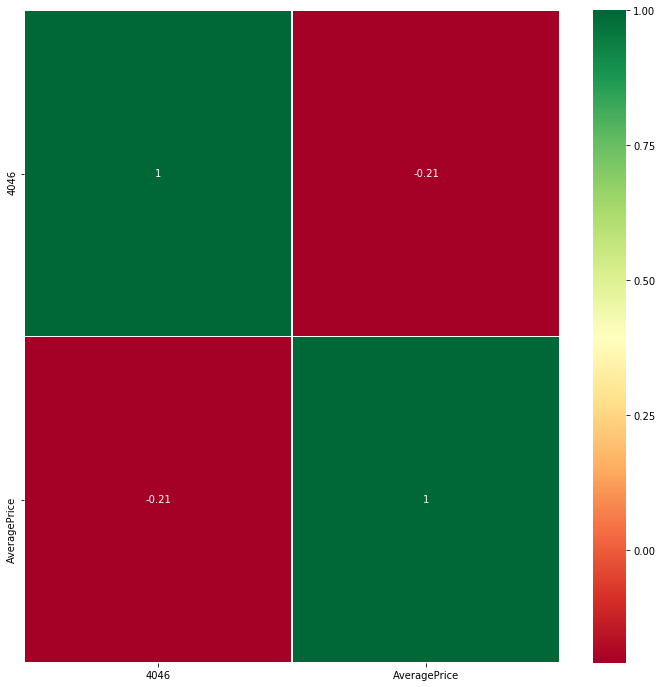

In [177]:
import seaborn as sns
from scipy.stats import pearsonr
# Подсчитанный коэффициент Пирсона
corr,value = pearsonr(df['4046'],df['AveragePrice'] )
print('Корреляция: ',corr)
sns.heatmap(df[['4046','AveragePrice']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()